In [1]:
import sys
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle
import rasterio
import pysal.viz.mapclassify as mc

In [20]:
def plot_dggs(dggs_array,columns,dggs):
    fig, ax = plt.subplots(1,len(dggs_array),figsize=(30,20),sharex='col')
    for num,frame in enumerate(dggs_array):
        ax[num].axis('off')
        ax[num].margins(0)
        ax[num].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        #ax[num].set_title(f'Resolution {num}')
        frame.to_crs('EPSG:4326').plot(column=columns, ax=ax[num])
        boundary.plot(color=None, edgecolor='r',linewidth = 0.3,ax=ax[num])
    plt.savefig(fr'd:\UTCloud\DGGS\results\pictures\aperture_examples\elev_{dggs}.png', bbox_inches="tight", pad_inches=0)

In [67]:
def plot_dggs_cor(dggs_array,columns,dggs):
    fig, ax = plt.subplots(1,len(dggs_array),figsize=(30,20),sharex='col')
    for num,frame in enumerate(dggs_array):
        frame[columns] = frame[columns].astype('int')
        ax[num].axis('off')
        ax[num].margins(0)
        ax[num].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        #ax[num].set_title(f'Resolution {num}')
        if frame.crs == None:
            frame=frame.set_crs('EPSG:4326')
        frame = frame.to_crs('EPSG:4326') 
        for cor_class, data in frame.groupby(columns):
            color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
            data.plot(ax=ax[num],color=color)
    
       # boundary.plot(color=None, edgecolor='r',linewidth = 0.3,ax=ax[num])
    plt.savefig(fr'd:\UTCloud\DGGS\results\pictures\aperture_examples\cor_{dggs}.png', bbox_inches="tight", pad_inches=0)

In [23]:
area = gpd.read_file(r'd:\UT\2Semester\Planning Project\task2\data\shp\Tartu_area.shp')
area = area.to_crs('EPSG:4326')
boundary =  area.boundary

In [43]:
## ELEVATION

In [2]:
proj_raster = rasterio.open(os.path.dirname(os.getcwd()) + r"/data/eesti_clipped/small_extent/MeritDEM90m_clipped_3301.tif")

In [3]:
# filter out weird values
clipped_raster_arr_filtered = proj_raster.read(1)[proj_raster.read(1)<3.4028235e+37]

In [4]:
# get classification
intervals = mc.EqualInterval(clipped_raster_arr_filtered,10)

In [6]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\ISEA4T_elev.pkl','rb') as f:
    dfs_4T = pickle.load(f)

In [26]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\ISEA3H_elev.pkl','rb') as f:
    dfs_3H = pickle.load(f)

In [27]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\s2_elev.pkl','rb') as f:
    dfs_s2 = pickle.load(f)

In [28]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\rHpix_elev.pkl','rb') as f:
    dfs_rHpix = pickle.load(f)

In [29]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\H3_elev.pkl','rb') as f:
    dfs_h3 = pickle.load(f)

In [16]:
def apply_classes(dfs,classes):
    for df in dfs:
        df['classes'] = df[['elevation']].apply(classes)
    return dfs

In [18]:
dfs_4T = apply_classes(dfs_4T,intervals)

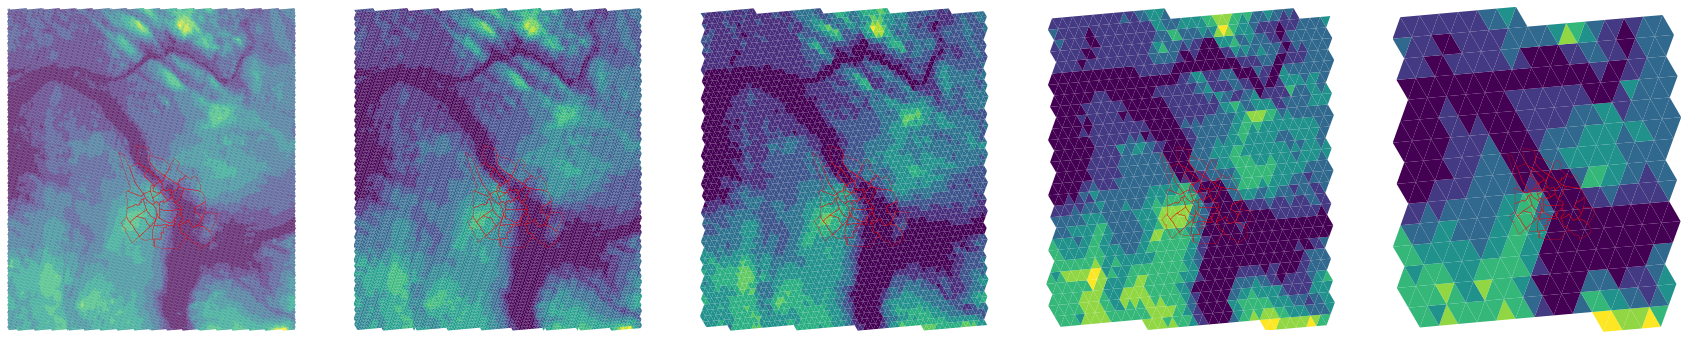

In [24]:
plot_dggs(dfs_4T,'classes','isea_4T')
#plt.savefig(r'd:\30_days\h3_elev.png', bbox_inches="tight", pad_inches=0.1, dpi=600)

In [30]:
dfs_3H = apply_classes(dfs_3H,intervals)

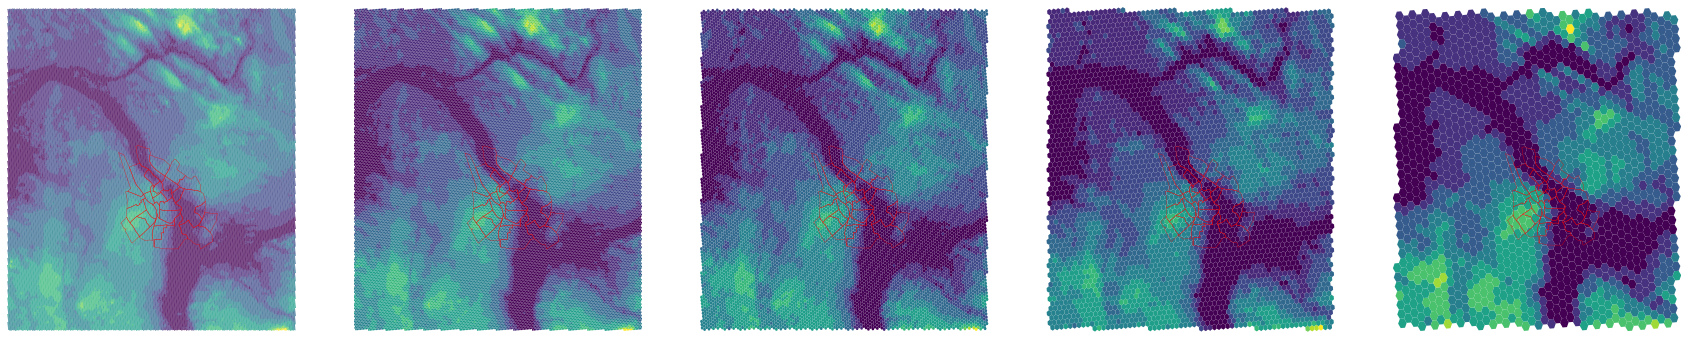

In [31]:
plot_dggs(dfs_3H,'classes','isea_3H')

In [32]:
dfs_s2 = apply_classes(dfs_s2,intervals)

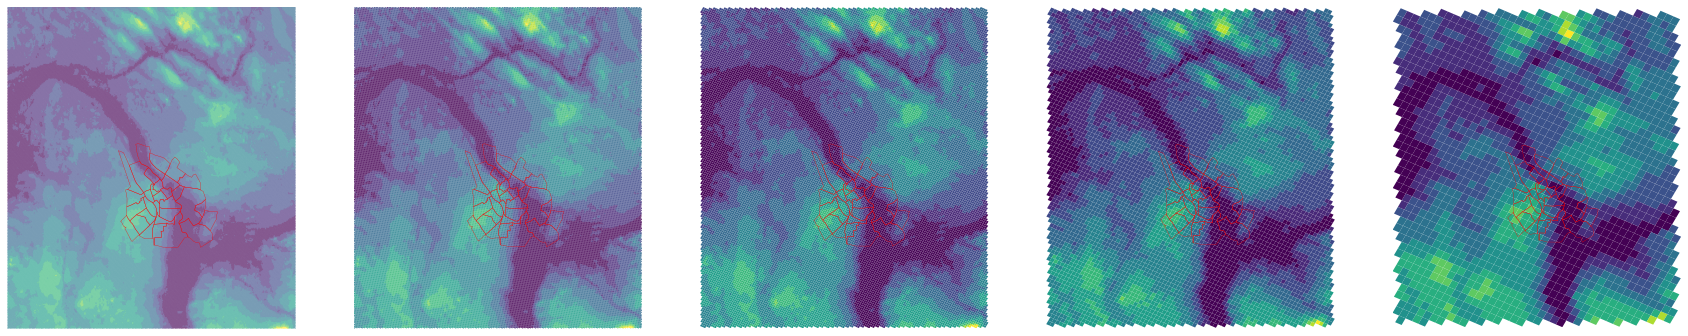

In [33]:
plot_dggs(dfs_s2,'classes','s2')

In [34]:
dfs_rHpix = apply_classes(dfs_rHpix,intervals)

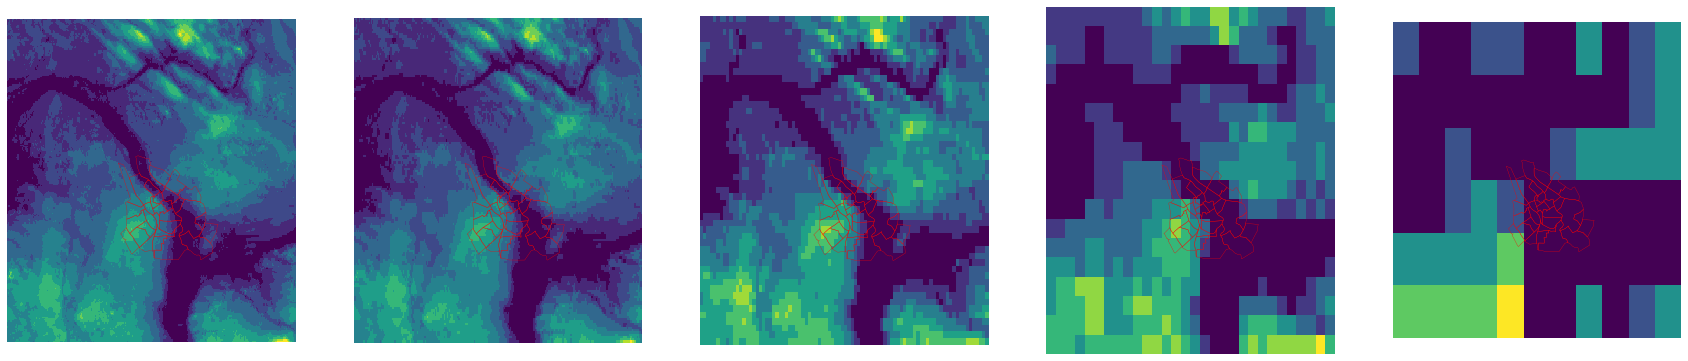

In [35]:
plot_dggs(dfs_rHpix,'classes', 'rhpix')

In [36]:
dfs_h3 = apply_classes(dfs_h3,intervals)

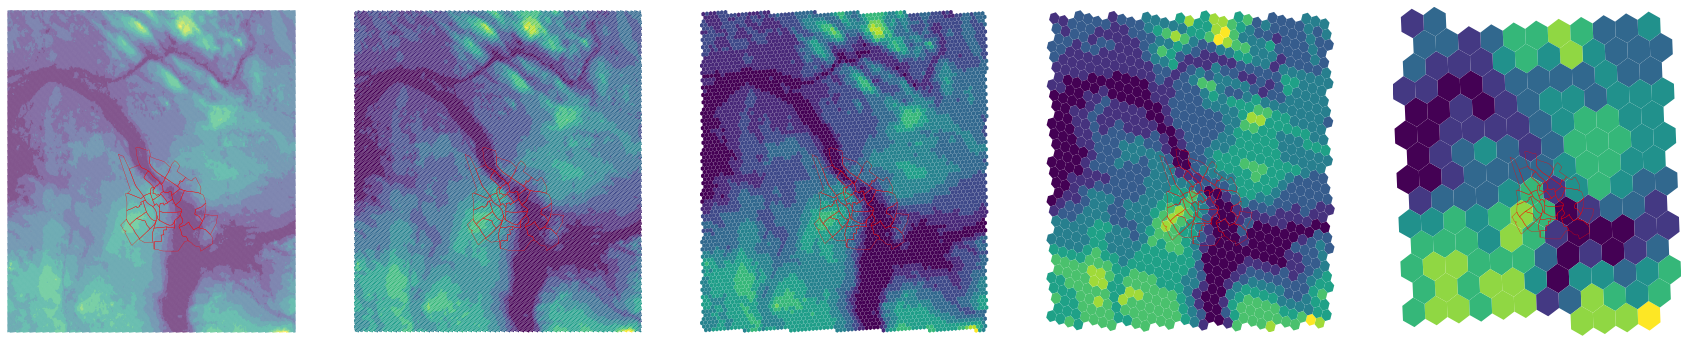

In [37]:
plot_dggs(dfs_h3,'classes','h3')

## land cover

In [28]:
corine_legend = pd.read_pickle(os.path.dirname(os.getcwd()) + r'/data/eesti_clipped/land_cover/corine_legend.pkl')

In [36]:
corine_legend.dtypes

GRID_CODE     int64
CLC_CODE      int64
LABEL3       object
RGB          object
rgb_tuple    object
dtype: object

In [124]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\ISEA4T_cor.pkl','rb') as f:
    dfs_4T = pickle.load(f)
for num,df in enumerate(dfs_4T):
    dfs_4T[num] = dfs_4T[num].set_crs('EPSG:3301')

In [125]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\ISEA3H_cor.pkl','rb') as f:
    dfs_3H = pickle.load(f)
for num,df in enumerate(dfs_3H):
    dfs_3H[num] = dfs_3H[num].set_crs('EPSG:3301')

In [126]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\s2_cor.pkl','rb') as f:
    dfs_s2 = pickle.load(f)

In [127]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\rHpix_cor.pkl','rb') as f:
    dfs_rHpix = pickle.load(f)
for num,df in enumerate(dfs_rHpix):
    dfs_rHpix[num] = dfs_rHpix[num].set_crs('EPSG:3301')

In [128]:
with open(r'd:\UTCloud\DGGS\grids\tartu_series\H3_cor.pkl','rb') as f:
    dfs_h3 = pickle.load(f)

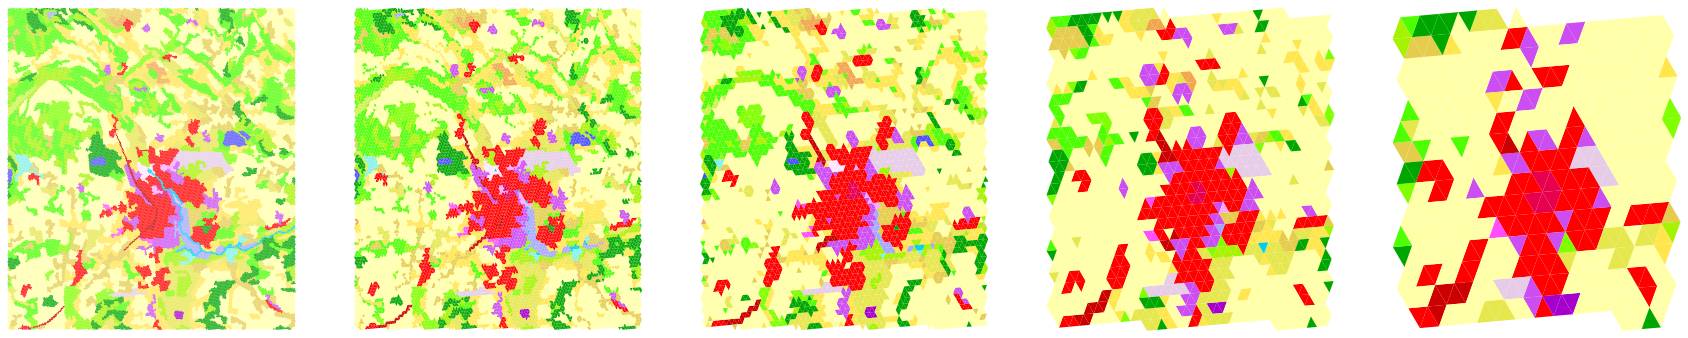

In [129]:
plot_dggs_cor(dfs_4T,'code_18','isea4T')
#plt.savefig(r'd:\30_days\h3_elev.png', bbox_inches="tight", pad_inches=0.1, dpi=600)

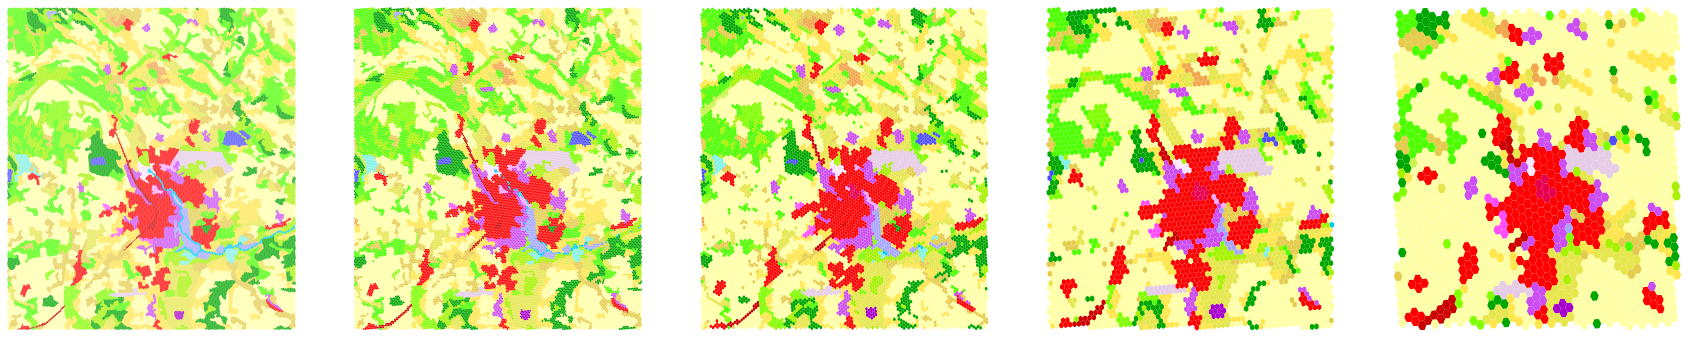

In [130]:
plot_dggs_cor(dfs_3H,'code_18','isea3H')

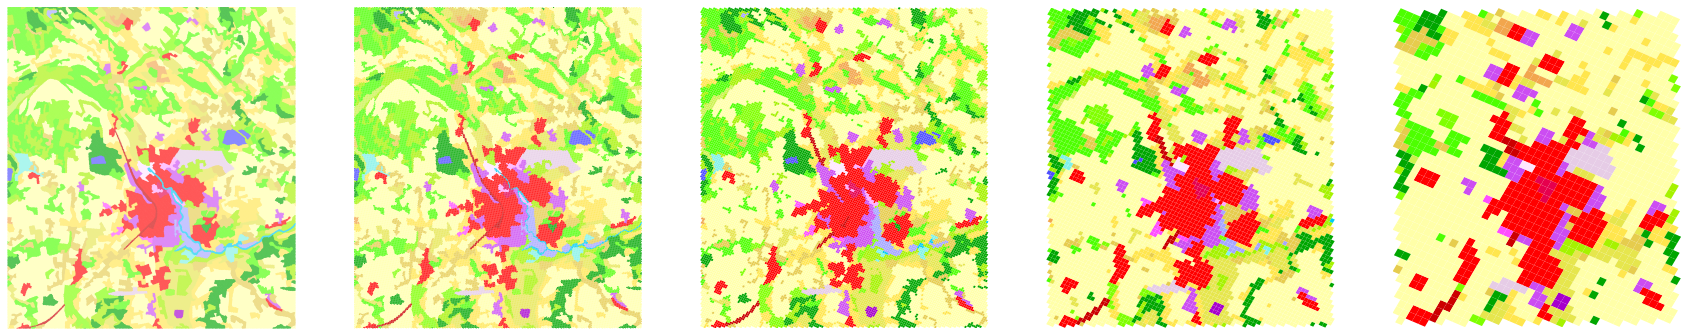

In [131]:
plot_dggs_cor(dfs_s2,'code_18','s2')

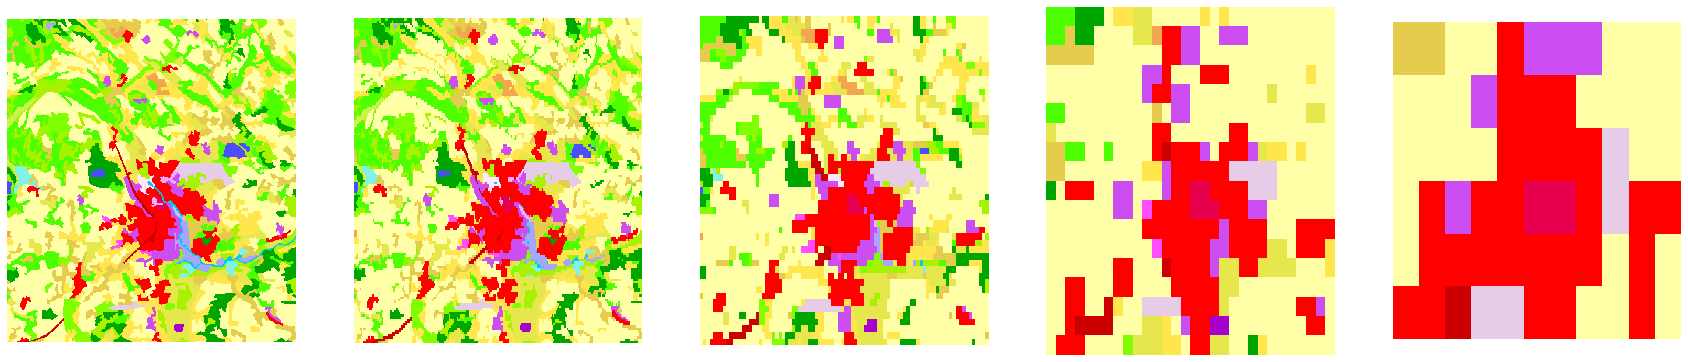

In [132]:
plot_dggs_cor(dfs_rHpix,'code_18','rhpix')

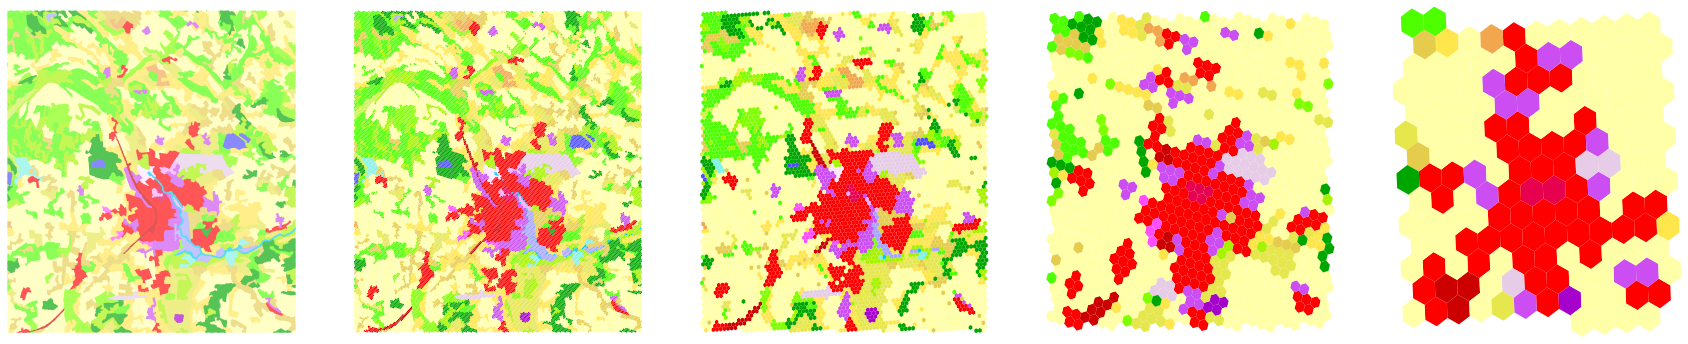

In [133]:
plot_dggs_cor(dfs_h3,'code_18','h3')